# Testing the effect of *Dropout Rates* on Loss and Accuracy

*This notebook uses the **Dog or Cat** data set available [here](http://files.fast.ai/data/dogscats.zip)*

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# Using the same data set as Deep Learning Part 1 - lesson 1
PATH = "data/dogscats/"
# Select an image model
arch=resnet50
# Set to the number of CPU Cores you have
workers=8
# this is an array we will iterate through to test each one
dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# these variables are used for capturing results
los = []
acc = []

## Learning Rate

Let's see how learning rate is affected by batch size, starting with a small 64 batch size.

In [4]:
sz=64 # 64x64 image size is very small and thus faster
bs=64 # batch size
learnrate = 5e-3 #0.005

In [5]:
tfms = tfms_from_model(arch, sz)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=workers)

### Let's try it with no dropouts (ps=0)

 89%|██████████████████████████████████████████████████████████▋       | 320/360 [01:21<00:10,  3.93it/s, loss=1.17]

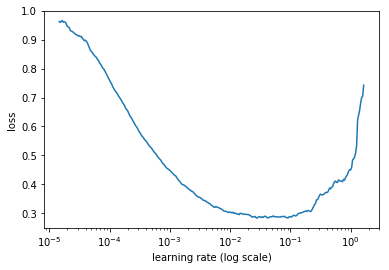

In [6]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=0)
# Finding the learning rate
lrf=learn.lr_find()
# Plotting the learning rate
learn.sched.plot()

Not very smooth. Due to the small batch size, we need a very small learning rate.
### Now let's try it with 90% dropout (ps=0.9)

 76%|█████████████████████████████████████████████████▊                | 272/360 [00:37<00:12,  7.17it/s, loss=3.31]

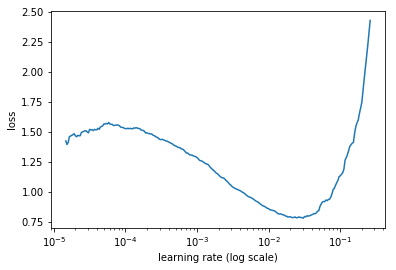

In [7]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=0.9)
# Finding the learning rate
lrf=learn.lr_find()
# Plotting the learning rate
learn.sched.plot()

## Time to change the batch size (increase by 8x) and see what happens

In [8]:
sz=64 # unchanged
bs=512 # batch size
learnrate = 1e-1 #0.1

In [9]:
tfms = tfms_from_model(arch, sz)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=workers)

Once again, start with no dropout.

epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.818998   29.909272  0.5       


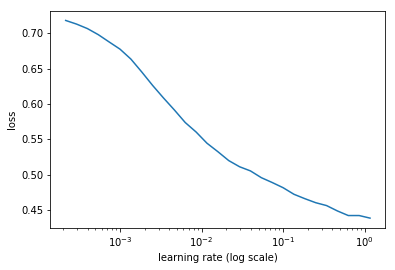

In [10]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=0)
# Finding the learning rate
lrf=learn.lr_find()
# Plotting the learning rate
learn.sched.plot()

Then switch to 0.9 dropout rate.

 98%|██████████████████████████████████████████████████████████████████▍ | 44/45 [00:52<00:01,  1.19s/it, loss=11.8]

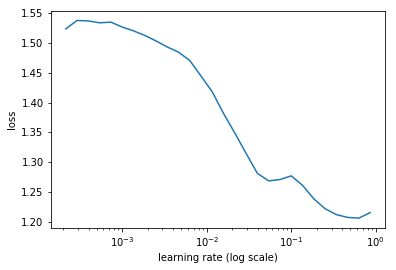

In [11]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=0.9)
# Finding the learning rate
lrf=learn.lr_find()
# Plotting the learning rate
learn.sched.plot()

### Learning Rate Conclusions:

It's important to see that the best **learning rate** needs to be ***smaller*** when the **dropout rate** ***increases***. However, the effect is quite minor and playing it safe with a smaller learning rate goes a long way.

# Start the Dropout Tests

We'll stick to the larger batch size and a learning rate of **0.1** for our tests.

In [12]:
#loop through all entries in the dropouts array
for dropout in dropouts:
    learn = ConvLearner.pretrained(arch, data, precompute=False, ps=dropout)
    
    print('Dropout Rate:',dropout)
    # Make sure we have enough cycles and due to dropout variability, let's make sure we are mixing things up a bit
    %time fit_array = learn.fit(learnrate, 3, cycle_len=1, cycle_mult=2)
    
    # learn.fit actually returns an array that looks like this: [[0.1983260258436203],0.9185000009536743]
    # it includes that last val_loss and accuracy values
    accuracy = fit_array[1]
    loss = fit_array[0][0]
    # add them to our arrays for charting later
    acc.append(accuracy)
    los.append(loss)

Dropout Rate: 0.0


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.313891   0.238979   0.9015    
    1      0.236251   0.209109   0.9                                                                                
    2      0.193279   0.204256   0.9085                                                                             
    3      0.18151    0.226737   0.9045                                                                             
    4      0.167762   0.204553   0.9115                                                                             
    5      0.151091   0.199123   0.9155                                                                             
    6      0.136914   0.198326   0.9185                                                                             
Wall time: 6min 45s
Dropout Rate: 0.1


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.29487    0.241098   0.8985    
    1      0.235337   0.209647   0.912                                                                              
    2      0.202847   0.205781   0.911                                                                              
    3      0.192033   0.210064   0.909                                                                              
    4      0.17901    0.20149    0.912                                                                              
    5      0.167881   0.194679   0.9185                                                                             
    6      0.154043   0.193296   0.918                                                                              
Wall time: 6min 42s
Dropout Rate: 0.2


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.301981   0.221078   0.9025    
    1      0.247449   0.205291   0.908                                                                              
    2      0.211668   0.201737   0.9135                                                                             
    3      0.199958   0.199892   0.9135                                                                             
    4      0.189626   0.195377   0.921                                                                              
    5      0.179039   0.191918   0.9155                                                                             
    6      0.170428   0.192304   0.922                                                                              
Wall time: 6min 54s
Dropout Rate: 0.3


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.314277   0.228572   0.904     
    1      0.252347   0.204062   0.9105                                                                             
    2      0.219778   0.200656   0.91                                                                               
    3      0.20895    0.204685   0.9125                                                                             
    4      0.194323   0.202164   0.9115                                                                             
    5      0.187408   0.19987    0.9095                                                                             
    6      0.180239   0.198669   0.9115                                                                             
Wall time: 6min 43s
Dropout Rate: 0.4


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.3502     0.242442   0.9085    
    1      0.267003   0.209516   0.907                                                                              
    2      0.229521   0.205296   0.9085                                                                             
    3      0.217855   0.201976   0.913                                                                              
    4      0.206247   0.198668   0.9115                                                                             
    5      0.197437   0.200144   0.9135                                                                             
    6      0.193778   0.198045   0.914                                                                              
Wall time: 6min 42s
Dropout Rate: 0.5


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.348336   0.228441   0.901     
    1      0.269257   0.210594   0.9085                                                                             
    2      0.23605    0.206997   0.9085                                                                             
    3      0.227369   0.206208   0.9055                                                                             
    4      0.216654   0.207942   0.911                                                                              
    5      0.209248   0.202635   0.91                                                                               
    6      0.203432   0.202215   0.9125                                                                             
Wall time: 6min 42s
Dropout Rate: 0.6


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.35884    0.234591   0.9055    
    1      0.283231   0.21209    0.909                                                                              
    2      0.250394   0.211954   0.9065                                                                             
    3      0.242761   0.209553   0.9055                                                                             
    4      0.23145    0.20608    0.9085                                                                             
    5      0.222923   0.202778   0.908                                                                              
    6      0.216216   0.203385   0.9075                                                                             
Wall time: 6min 41s
Dropout Rate: 0.7


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.415222   0.241203   0.897     
    1      0.306432   0.227006   0.901                                                                              
    2      0.264838   0.215508   0.905                                                                              
    3      0.253856   0.212489   0.907                                                                              
    4      0.248892   0.211316   0.909                                                                              
    5      0.239391   0.20932    0.9035                                                                             
    6      0.232855   0.209022   0.902                                                                              
Wall time: 6min 42s
Dropout Rate: 0.8


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.409448   0.237868   0.898     
    1      0.336095   0.224038   0.9                                                                                
    2      0.297716   0.225738   0.903                                                                              
    3      0.28754    0.218264   0.9005                                                                             
    4      0.275963   0.233699   0.9005                                                                             
    5      0.265997   0.21536    0.9055                                                                             
    6      0.25896    0.217302   0.904                                                                              
Wall time: 6min 41s
Dropout Rate: 0.9


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.643262   0.251027   0.892     
    1      0.514817   0.242757   0.8975                                                                             
    2      0.407519   0.246788   0.89                                                                               
    3      0.395401   0.24441    0.891                                                                              
    4      0.373275   0.237093   0.8915                                                                             
    5      0.338504   0.232159   0.8995                                                                             
    6      0.316478   0.232081   0.8965                                                                             
Wall time: 6min 43s


Looking at the *trn_loss* vs *val_loss* you can see it going from overfitting to underfitting. But if you went just by those values, you would be choosing a dropout rate of 0.3-0.5 which, as we'll see, isn't actually the best for our data set.

### Now that we have our results we print out the arrays so we don't have to rerun the entire notebook just to play with the charting

In [13]:
print(dropouts)
print(acc)
print(los)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[0.9185000009536743, 0.9180000066757202, 0.9220000066757202, 0.9114999952316284, 0.9139999985694885, 0.9124999980926514, 0.907499997138977, 0.9019999947547913, 0.903999997138977, 0.8964999933242798]
[0.1983260258436203, 0.19329571437835694, 0.19230403864383697, 0.1986690136194229, 0.19804472887516023, 0.20221455514431, 0.20338530087471007, 0.209022167801857, 0.21730239295959472, 0.23208116745948792]


Oh look, a convenient place to enter those arrays...

In [14]:
#cheatsheet of results
#acc = [0.9185000009536743, 0.9180000066757202, 0.9220000066757202, 0.9114999952316284, 0.9139999985694885, 0.9124999980926514, 0.907499997138977, 0.9019999947547913, 0.903999997138977, 0.8964999933242798]
#los = [0.1983260258436203, 0.19329571437835694, 0.19230403864383697, 0.1986690136194229, 0.19804472887516023, 0.20221455514431, 0.20338530087471007, 0.209022167801857, 0.21730239295959472, 0.23208116745948792]

## Interpreting Results

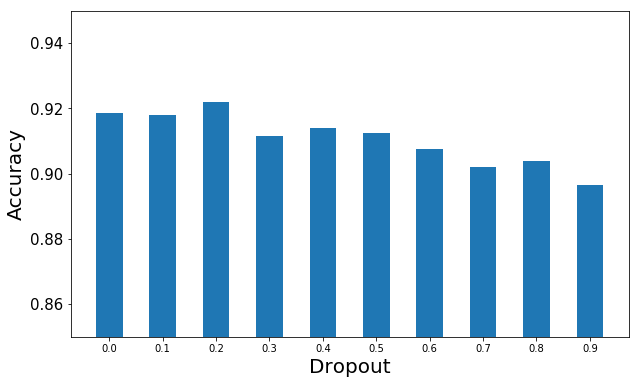

In [17]:
width = 0.05 # bar width
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set new size (0=width,1=height)
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

plt.bar(dropouts, acc, width, align='center')

plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=15)

xrange = np.arange(0,1,.1)
plt.xticks(xrange, dropouts)
plt.ylim(.85,.95)

plt.xlabel('Dropout', size = 20)
plt.ylabel('Accuracy',size = 20)

plt.show()

_**Note:** Larger is better._

While accuracy doesn't vary greatly (2%), machine learning is all about small gains. A lot of small gains from hyperparameters add up to a really reliable model, not to mention a big difference in a Kaggle competition. 

Since we used **small images** for this run, we get clearer results from the **Accuracy** chart. The strongest case is 0.2 dropout rate with larger rates causing worse results.

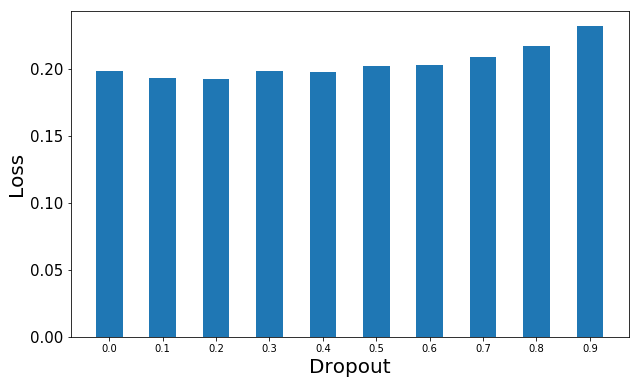

In [16]:
plt.bar(dropouts, los, width, align='center')

plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=15)

xrange = np.arange(0,1,.1)
plt.xticks(xrange, dropouts)
#plt.gca().invert_yaxis()

plt.xlabel('Dropout', size = 20)
plt.ylabel('Loss',size = 20)

plt.show()

_**Note:** Smaller is better._

Since we used small images for this run, we get really tight results from the Loss chart. Loss charts are more useful with **larger images**, but since they take longer and will typically lead you to the same conclusion (0.2 dropout rate in this data set), faster is better by using Accuracy and small images.